<a href="https://colab.research.google.com/github/kaddef/Function-Approximation/blob/main/FunctionApproximation6_20x20HiddenLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
def y(x):
    #return (np.sin(2*np.pi*x) + np.sin(5*np.pi*x))
    return (np.power(x,2))

In [ ]:
x_vals = np.arange(-1,1,0.0002)
y_vals = y(x_vals)
print(x_vals.shape)
print(y_vals.shape)
#print(type(x_vals))
#print(type(y_vals))

(10000,)
(10000,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.20)
x_train = np.array(x_train)
y_train = np.array(y_train)

xtrainplot = np.array(x_train)
xtestplot = x_test
#print(x_train[0])
#print(y_train[0])

In [ ]:
#plt.figure(1)
#plt.plot(x_train, y_train, 'o')
#plt.plot(x_test, y_test, 'x')
#plt.show()

In [ ]:
x_train = x_train.reshape(1,-1)
x_test = x_test.reshape(1,-1)

In [ ]:
def init_params():
    W1 = np.random.rand(20, 1) - 0.5
    b1 = np.random.rand(20, 1) - 0.5
    W2 = np.random.rand(20, 20) - 0.5
    b2 = np.random.rand(20, 1) - 0.5
    W3 = np.random.rand(20, 1) - 0.5
    b3 = np.random.rand(1, 1) - 0.5
    """
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))

    W1 = np.random.normal(size=(10, 1)) * np.sqrt(1./(2))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(10))
    W3 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    b3 = np.random.normal(size=(1, 1)) * np.sqrt(1./(10))
    """
    return W1, b1, W2, b2, W3, b3

In [ ]:
def sigmoid(x):
 return 1/(1 + np.exp(-x))

def sigmoid_deriv(x):
  #print("input",x.shape,x[0][0])
  #print("Sig_deriv",x.shape,sigmoid(x[0][0]) * (1-sigmoid(x[0][0])))
  return sigmoid(x) * (1-sigmoid(x))

def ReLU(Z):
    return np.maximum(Z, 0)
    
def ReLU_deriv(Z):
    return Z > 0

In [ ]:
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    #print(A1.shape,"A1")

    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    #print(A2.shape,"A2")

    Z3 = W3.T.dot(A2) + b3
    A3 = Z3
    #print(A3.shape,"A3")
    return Z1, A1, Z2, A2, Z3, A3

#W1, b1, W2, b2, W3, b3 = init_params()
#Z1, A1, Z2, A2, A3, Z3 = forward_prop(W1, b1, W2, b2, W3, b3, x_train[0][0])

#print(Z1.shape,"Z1")
#print(Z2.shape,"Z2")
#print(Z3.shape,"Z3")
#print(type(Z1))
#print(type(Z2))
#print(type(Z3))

In [ ]:
def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    dZ3 = 2 * (A3 - Y)
    dW3 = dZ3.dot(A2.T)
    #print(dW3.shape,"dW3",type(dW3))
    db3 = np.sum(dZ3)

    dZ2 = W3.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = dZ2.dot(A1.T)
    #print(dW2.shape,"dW2",type(dW2))
    db2 = np.sum(dZ2)

    dZ1 = W2.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = dZ1.dot(X.T)
    #print(dW1.shape,"dW1",type(dW1))
    db1 = np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3

#W1, b1, W2, b2, W3, b3 = init_params()
#Z1, A1, Z2, A2, A3, Z3 = forward_prop(W1, b1, W2, b2, W3, b3, x_train[0][0])
#dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, x_train[0][0], y_train[0])

In [ ]:
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1 

    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2 

    W3 = W3 - alpha * dW3.T
    b3 = b3 - alpha * db3  

    return W1, b1, W2, b2, W3, b3

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [ ]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()

    for i in range(iterations):
        Z1, A1, Z2, A2, A3, Z3 = forward_prop(W1, b1, W2, b2, W3, b3, X[0][i])
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X[0][i], Y[i])
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 100 == 0:
            #print("Iteration: ", i)
            #print("X Value: ", X[0][i],type(X[0][i]))
            #print("Y Value: ", Y[i],type(Y[i]))
            #print("Predicted Y Value: ", A3,type(A3))
            #predictions = get_predictions(A3)
            #print("Accuracy", A3-Y[i],type(A3-Y[i]))
            #print("=============================================================")
            plt.figure(1)
            plt.plot(X[0][i], A3, 'ro')
            plt.figure(2)
            plt.plot(i, A3, 'yo')
            

    return W1, b1, W2, b2, W3, b3

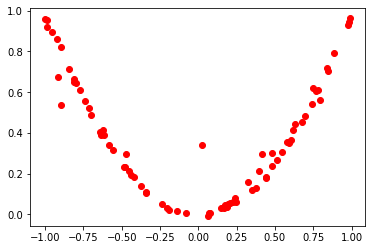

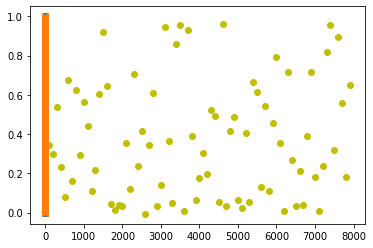

In [ ]:
W1, b1, W2, b2, W3, b3 = gradient_descent(x_train, y_train, 0.05, 8000)
plt.plot(xtrainplot, y_train, 'o')
plt.plot(xtestplot, y_test, 'x')
plt.show()

In [ ]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    Z1, A1, Z2, A2, Z3,A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = A3
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_x = x_test[0][index]
    
    prediction = make_predictions(x_test[0][index], W1, b1, W2, b2, W3, b3)
    label = y_test[index]
    #print("X Value: ", x_test[0][index])
    #print("Label: ", label)
    #print("Prediction: ", prediction)
    plt.plot(x_test[0][index], prediction, 'go', zorder=3)
    #print("========================")

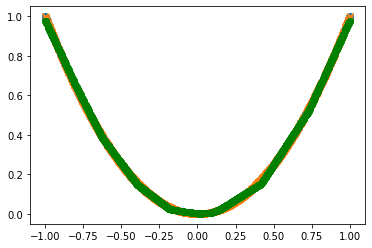

In [ ]:
#test_prediction(0, W1, b1, W2, b2)
#test_prediction(1, W1, b1, W2, b2)
#test_prediction(2, W1, b1, W2, b2)
for i in range(x_test.size):
  test_prediction(i, W1, b1, W2, b2, W3, b3)

plt.plot(xtrainplot, y_train, 'o')
plt.plot(xtestplot, y_test, 'x')
plt.show()